In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from qutip import about, basis, destroy, mesolve, ptrace, qeye, tensor, wigner

%matplotlib inline

In [2]:
wc = 1.0 * 2 * np.pi 
wa = 1.0 * 2 * np.pi 
g = 0.1 * 2 * np.pi
kappa = 0.005  
gamma = 0.05  
N = 15  
n_th_a = 0.0  
use_rwa = True

tlist = np.linspace(0, 25, 101)

In [3]:

psi0 = tensor(basis(N, 0), basis(2, 1))  

a = tensor(destroy(N), qeye(2))
sm = tensor(qeye(N), destroy(2))

if use_rwa:
    H = wc * a.dag() * a + wa * sm.dag() * sm + \
        g * (a.dag() * sm + a * sm.dag())
else:
    H = wc * a.dag() * a + wa * sm.dag() * sm + \
        g * (a.dag() + a) * (sm + sm.dag())

In [4]:
c_ops = []

rate = kappa * (1 + n_th_a)
if rate > 0.0:
    c_ops.append(np.sqrt(rate) * a)

rate = kappa * n_th_a
if rate > 0.0:
    c_ops.append(np.sqrt(rate) * a.dag())

rate = gamma
if rate > 0.0:
    c_ops.append(np.sqrt(rate) * sm)

In [5]:
output = mesolve(H, psi0, tlist, c_ops, [a.dag() * a, sm.dag() * sm])

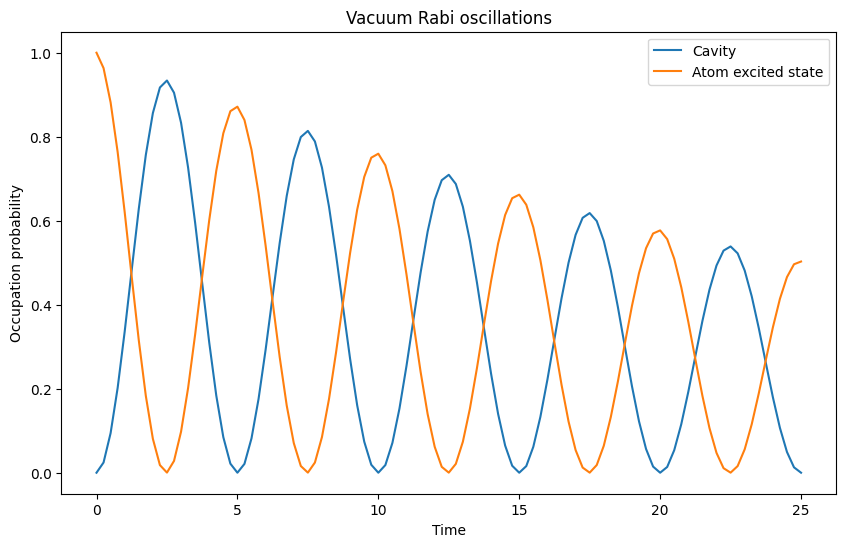

In [6]:
n_c = output.expect[0]
n_a = output.expect[1]

fig, axes = plt.subplots(1, 1, figsize=(10, 6))

axes.plot(tlist, n_c, label="Cavity")
axes.plot(tlist, n_a, label="Atom excited state")
axes.legend(loc=0)
axes.set_xlabel("Time")
axes.set_ylabel("Occupation probability")
axes.set_title("Vacuum Rabi oscillations");

In [7]:
output = mesolve(H, psi0, tlist, c_ops, [])

In [9]:
t_idx = np.linspace(0, len(tlist) - 1, dtype=int)
tlist[t_idx]

array([ 0.  ,  0.5 ,  1.  ,  1.5 ,  2.  ,  2.5 ,  3.  ,  3.5 ,  4.  ,
        4.5 ,  5.  ,  5.5 ,  6.  ,  6.5 ,  7.  ,  7.5 ,  8.  ,  8.5 ,
        9.  ,  9.5 , 10.  , 10.5 , 11.  , 11.5 , 12.  , 12.75, 13.25,
       13.75, 14.25, 14.75, 15.25, 15.75, 16.25, 16.75, 17.25, 17.75,
       18.25, 18.75, 19.25, 19.75, 20.25, 20.75, 21.25, 21.75, 22.25,
       22.75, 23.25, 23.75, 24.25, 25.  ])

In [10]:
rho_list = [output.states[i] for i in t_idx]


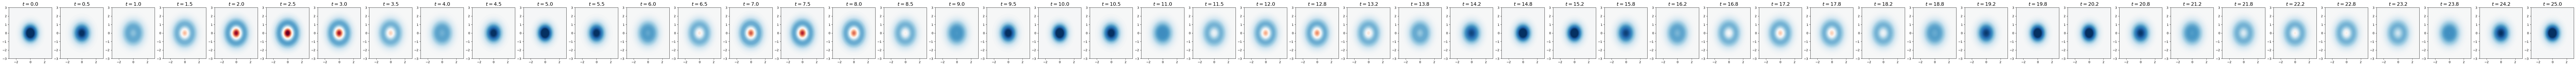

In [11]:
xvec = np.linspace(-3, 3, 200)

fig, axes = plt.subplots(1, len(rho_list), sharex=True,
                         figsize=(3 * len(rho_list), 3))

for idx, rho in enumerate(rho_list):

    rho_cavity = ptrace(rho, 0)

    W = wigner(rho_cavity, xvec, xvec)

    axes[idx].contourf(
        xvec,
        xvec,
        W,
        100,
        norm=mpl.colors.Normalize(-0.25, 0.25),
        cmap=plt.get_cmap("RdBu"),
    )

    axes[idx].set_title(r"$t = %.1f$" % tlist[t_idx][idx], fontsize=16)

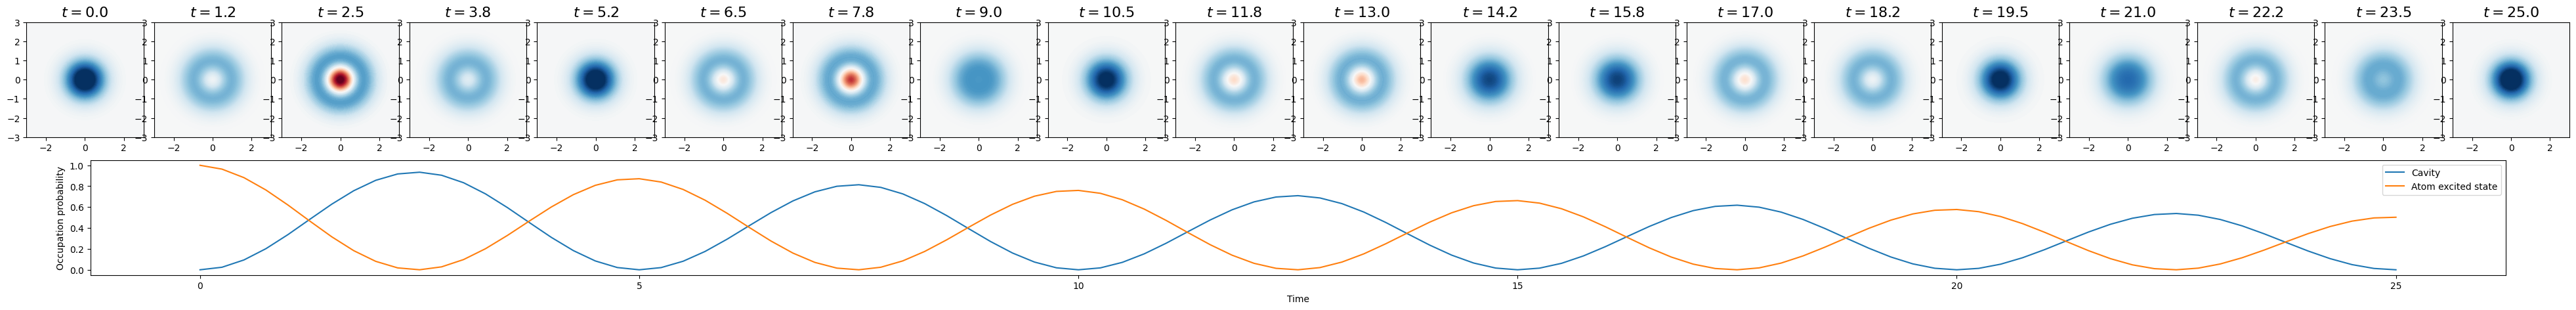

In [12]:
N_snapshots = 20
t_idx = np.linspace(0, len(tlist) - 1, N_snapshots, dtype=int)

rho_list = [output.states[i] for i in t_idx]

fig_grid = (2, len(rho_list) * 2)
fig = plt.figure(figsize=(2.5 * len(rho_list), 5))

for idx, rho in enumerate(rho_list):
    rho_cavity = ptrace(rho, 0)
    W = wigner(rho_cavity, xvec, xvec)
    ax = plt.subplot2grid(fig_grid, (0, 2 * idx), colspan=2)
    ax.contourf(
        xvec,
        xvec,
        W,
        100,
        norm=mpl.colors.Normalize(-0.25, 0.25),
        cmap=plt.get_cmap("RdBu"),
    )
    ax.set_title(r"$t = %.1f$" % tlist[t_idx][idx], fontsize=16)

ax = plt.subplot2grid(fig_grid, (1, 1), colspan=(fig_grid[1] - 2))
ax.plot(tlist, n_c, label="Cavity")
ax.plot(tlist, n_a, label="Atom excited state")
ax.legend()
ax.set_xlabel("Time")
ax.set_ylabel("Occupation probability");